In [83]:
import numpy as np
import sys
import threading
import random
import math
import time
import matplotlib.pyplot as plt

sys.setrecursionlimit(10**7)
threading.stack_size(2**27)

134217728

In [84]:
def ConvertToInt(message_str):
    res = 0
    for i in range(len(message_str)):
        res = res * 256 + ord(message_str[i])
    return res


def ConvertToStr(n):
    res = ""
    while n > 0:
        res += chr(n % 256)
        n //= 256
    return res[::-1]

In [85]:
def GCD(a, b):
    if b == 0:
        return a
    return GCD(b, a % b)


def ExtendedEuclid(a, b):
    if b == 0:
        return (1, 0)
    (x, y) = ExtendedEuclid(b, a % b)
    k = a // b
    return (y, x - k * y)

def PowMod(a, n, mod):
    if n == 0:
        return 1 % mod
    elif n == 1:
        return a % mod
    else:
        b = PowMod(a, n // 2, mod)
        b = b * b % mod
        if n % 2 == 0:
            return b
        else:
            return b * a % mod


def InvertModulo(a, n):
    (b, x) = ExtendedEuclid(a, n)
    if b < 0:
        b = (b % n + n) % n
    return b

In [86]:
def IsPrime(p, k = 30):
    # Miller–Rabin test
    if p == 2:
        return True
    if p % 2 == 0:
        return False
    r = 0
    d = p - 1
    while d % 2 == 0:
        r += 1
        d //= 2
    for _ in range(k):
        a = random.randint(2, p - 1)
        x = PowMod(a, d, p)
        if x == 1 or x == p - 1:
            continue
        for _ in range(r - 1):
            x = PowMod(x, 2, p)
            if x == p - 1:
                break
        else:
            return False
    return True

def GeneratePrime(bits):
    p = random.randint(2**(bits - 1), 2**bits)
    while not IsPrime(p):
        p = random.randint(2**(bits - 1), 2**bits)
    return p


In [121]:
class RSA:
  def __init__(self, p = 0, q = 0, e = 0, nBits = 128):
    self.p = p
    self.q = q
    self.e = e
    self.nBits = nBits
    if self.p < 2 or self.q < 2 or not IsPrime(self.p) or not IsPrime(self.q):
        self.p = GeneratePrime(nBits//2 + nBits % 2)
        self.q = GeneratePrime(nBits//2)
        self.e = 0
    else:
        self.nBits = math.ceil(math.log2(self.p * self.q))

    phi = (self.p - 1) * (self.q - 1)

    if GCD(self.e, phi) != 1 or self.e < 2 or self.e > phi-1:
        self.e = random.randint(2, phi - 1)
        while GCD(self.e, phi) != 1:
            self.e = random.randint(2, phi - 1)

  def Encrypt(self, m):
    n = self.p * self.q
    strN = ConvertToStr(n)
    chunks, chunk_size = len(m), max(len(strN) - 1, 1)
    m = [m[i:i+chunk_size] for i in range(0, chunks, chunk_size)]
    c = []
    for mi in m:
        IntM = ConvertToInt(mi)
        IntC = PowMod(IntM, self.e, n)
        c.append(IntC)
    return c

  def Decrypt(self, c):
      m = []
      T = (self.p-1)*(self.q-1)
      (d, y) = ExtendedEuclid(self.e, T)
      while d < 0:
          d += T
      for ci in c:
          IntM = PowMod(ci, d, self.p * self.q)
          m.append(ConvertToStr(IntM))
      return ''.join(m)
  def DecryptOutInt(self, c):
    m = []
    T = (self.p-1)*(self.q-1)
    (d, y) = ExtendedEuclid(self.e, T)
    while d < 0:
        d += T
    for ci in c:
        IntM = PowMod(ci, d, self.p * self.q)
        m.append(IntM)
    return m

attacknowmanmotherfuckerloserqwertyuiopasdfghjklzxcvbnm
attacknowmanmotherfuckerloserqwertyuiopasdfghjklzxcvbnm
attacknowmanmotherfuckerloserqwertyuiopasdfghjklzxcvbnm
attacknowmanmotherfuckerloserqwertyuiopasdfghjklzxcvbnm


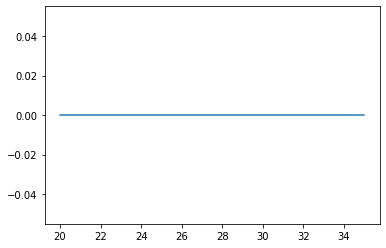

In [103]:
# p = 101
# q = 103
# rsa = RSA(e=5, p=p, q=q)
# ciphertext = rsa.Encrypt("attacknowmanmotherfuckerloserqwertyuiopasdfghjklzxcvbnm")
# message = rsa.Decrypt(ciphertext)
#print(message)
x = []
y = []
for i in range(20, 40, 5):
    rsa = RSA(nBits=i)
    start = time.time()
    ciphertext = rsa.Encrypt("attacknowmanmotherfuckerloserqwertyuiopasdfghjklzxcvbnm")
    end = time.time()
    print(rsa.Decrypt(ciphertext))
    x.append(i)
    y.append(end-start)

plt.plot(x, y)



In [89]:
for i in range(9, 20, 1):
    rsa = RSA(nBits=i)
    ciphertext = rsa.Encrypt("attacknowmanmotherfuckerloserqwertyuiopasdfghjklzxcvbnm")
    print(i, rsa.Decrypt(ciphertext))


9 attacknowmanmotherfuckerloserqwertyuiopasdfghjklzxcvbnm
10 attacknowmanmotherfuckerloserqwertyuiopasdfghjklzxcvbnm
11 attacknowmanmotherfuckerloserqwertyuiopasdfghjklzxcvbnm
12 attacknowmanmotherfuckerloserqwertyuiopasdfghjklzxcvbnm
13 attacknowmanmotherfuckerloserqwertyuiopasdfghjklzxcvbnm
14 attacknowmanmotherfuckerloserqwertyuiopasdfghjklzxcvbnm
15 attacknowmanmotherfuckerloserqwertyuiopasdfghjklzxcvbnm
16 attacknowmanmotherfuckerloserqwertyuiopasdfghjklzxcvbnm
17 attacknowmanmotherfuckerloserqwertyuiopasdfghjklzxcvbnm
18 attacknowmanmotherfuckerloserqwertyuiopasdfghjklzxcvbnm
19 attacknowmanmotherfuckerloserqwertyuiopasdfghjklzxcvbnm


In [124]:
def ChosenCiphertextAttack(c, e, p, q):
    n = p * q
    r = random.randint(2, n)
    while GCD(r, n) != 1:
        r = random.randint(2, n)

    c2 = c * PowMod(r, e, n) % n
    rsa = RSA(p,q,e)
    y = rsa.DecryptOutInt([c2])[0]
    return ConvertToStr(y * InvertModulo(r, n) % n)

In [127]:
p = 101
q = 103
rsa = RSA(e=5, p=p, q=q)
ciphertext = rsa.Encrypt("attack_now_man_loser_qwertyuiopasdfghjklzxcvbnm")
for c in ciphertext:
    print(ChosenCiphertextAttack(c, rsa.e, rsa.p, rsa.q), end='')


attack_now_man_loser_qwertyuiopasdfghjklzxcvbnm